In [2]:
%reset-f


In [3]:
%load_ext autoreload
%autoreload
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os, time
import warnings
import fileinput
from subprocess import call

from IPython.display import SVG,Image
from maps_lib import *
import pandas as pd

warnings.filterwarnings("always",category=UserWarning)

###Data

In [4]:
#gdp ppp
df = pd.read_csv("countries_gdp_pc.csv").dropna()
bins= [0, 2500, 4000]

#gdp bins to color
df["color"]=pd.cut(df.gdp_pc_ppp,bins,labels=["#31a354","#a1d99b"])

#df=pd.read_csv("countries_below_4000.txt")
ctoiso=pd.read_csv("names_to_iso.csv",usecols=["country","iso2"], index_col="country", squeeze=True)

df["iso2"]=df.country.map(ctoiso)
df[df.iso2.isnull()] #should be empty

,country,gdp_pc_ppp,color,iso2
7,Arab World,15509.844259,NaN,NaN
14,"Bahamas, The",22439.351042,NaN,NaN
39,Central Europe and the Baltics,22906.707263,NaN,NaN
59,East Asia & Pacific (all income levels),14214.698862,NaN,NaN
60,East Asia & Pacific (developing only),11335.408899,NaN,NaN
68,Euro area,36924.573741,NaN,NaN
69,Europe & Central Asia (all income levels),27583.381370,NaN,NaN
70,Europe & Central Asia (developing only),13448.698981,NaN,NaN
71,European Union,34658.380432,NaN,NaN
75,Fragile and conflict affected situations,3437.779414,#a1d99b,NaN


In [5]:
df=df.dropna()

###Export map data

In [6]:
df.to_csv('map_of_countries_below_4000_and_2500.csv')

###Map

In [7]:
style_base =\
""".landxx.{iso2}
{{  
   fill: {color};
   stroke:#000000;
   stroke-width:0.3;
   fill-rule:evenodd;
}}"""

styles_rl=styles_r=styles=""
for c in df.index:
    styles = styles     + style_base.format(iso2=df["iso2"][c].lower(),color=df["color"][c])+ "\n"

append_styles_to_map("map_of_countries_below_4000_and_2500",styles)


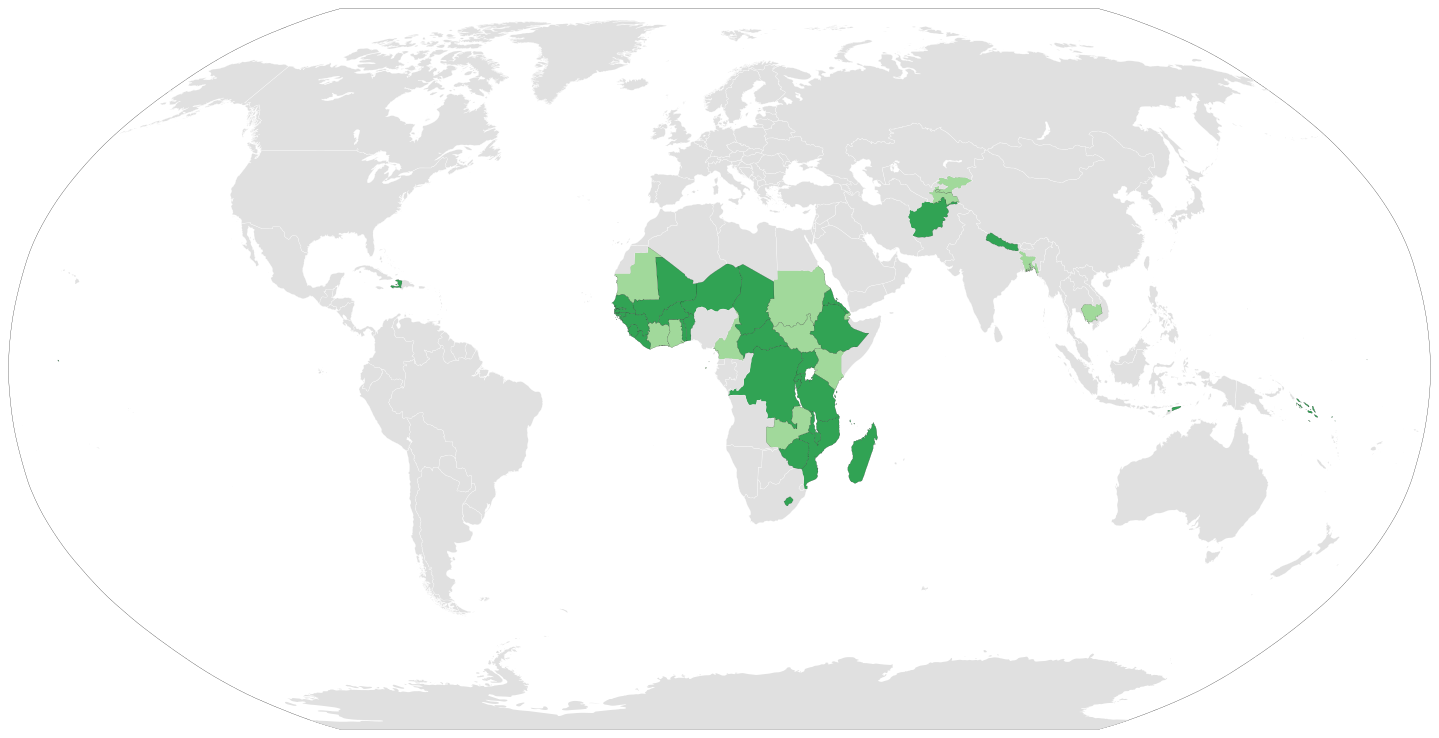

In [8]:
Image("map_of_countries_below_4000_and_2500.png",width=700)